
<font size = 5 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 4 >In this Exercise the main purpose is to learn the structure and features of the Neural Networks. Because the ANN are in every domain of Data Science the need for them knowledge is obligational. Therefore, in this Exercise you need to train different structures of NN's with main goal of finding the best 3 models for the given Dataset.</font>

<font color = 'Orange' size = 4 > Structure of the Dataset </font>

<font color = 'Orange'>
In this Dataset you have historical informations about the Bitcoin price in the next day and thirty days before.
<li>Target column (Y): Closе - closed price for the next day of the Bitcoin</li>
<li>X columns: Close_i {i e [1,30]}</li>
<li>Close_i: Closed price of the Bitcoin i days ago</li>

</font>



<font color = 'Orange' size = 4 > Train different NN's </font>
<ul>
<font color = 'Orange'>
Try to train different kinds of NN's structures
<li>Choose the number of layers your model will have</li>
<li>Choose the number of neurons in each hidden layer</li>
<li>Choose activation function for each layer: relu, sigmoid, softmax, softsign, linear,... </li>
<li>Choose the loss function for compiling: mean_squared_error, mean_absolute_error, root_mean_squared_error, ....</li>
<li>Choose the optimizer function for compiling: adam, adagrad, adamax, sgd,....</li>
<li>Choose the number of epochs and the batch size for the training part</li>
</ul>

<ul>

<font color = 'Orange'>
Save the three best models in a table with the given columns
<li>Number of the model</li>
<li>Number of layers</li>
<li>Number of neurons in each layer</li>
<li>Activation function for each layer</li>
<li>Loss function</li>
<li>Optimizer function for compiling</li>
<li>Number of epochs</li>
<li>Batch size</li>
<li>R2 score for the prediction of the test part (this is the metric for rating the models)</li>

</ul>
</font>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [111]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/BTC_dataset.csv")
dataset.head()

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029


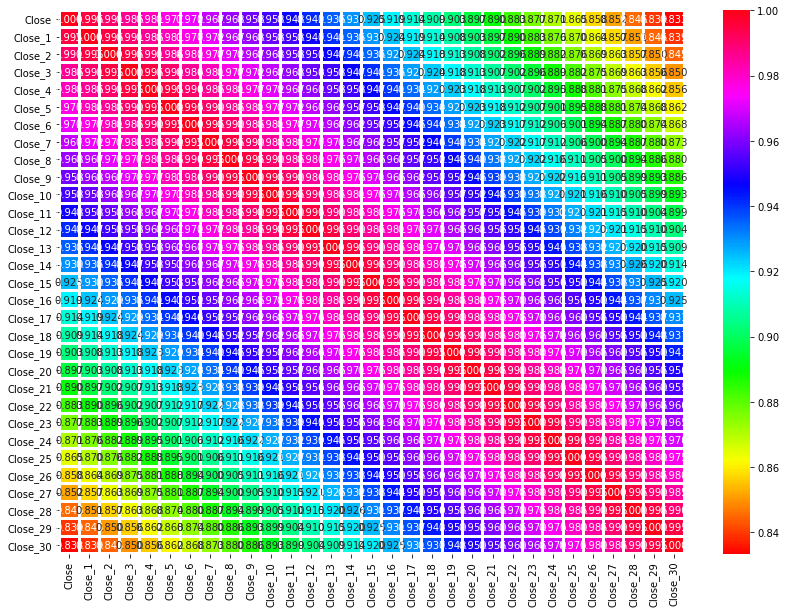

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [113]:
 from sklearn.model_selection import train_test_split
X = dataset.drop(['Close','Date'], axis = 1)
y = dataset.Close.values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
from keras.models import Sequential
from keras.layers import Dense
layers = [5,6,7]
neurons = [8,16,32,64,96]
activations = ['relu','swish','tanh']
losses = ['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error','cosine_similarity']
optimizers = ['Adam','Adamax','Nadam']
epoches = [100,150,200]
batches = [10,15,20]
models = list()
scores = dict()



In [116]:
import random
from sklearn.metrics import r2_score 
for num_model in range(1,10):
  sample_model=list()
  losss=random.choice(losses)
  optm = random.choice(optimizers)

  epoch = random.choice(epoches)
  batch = random.choice(batches)
    
  neurons_layers=list()
  activations_layers = list()
    
  layer = random.choice(layers)
  neuron = random.choice(neurons)
  act= random.choice(activations)

  number_layers= layer+2
  neurons_layers.append(neuron)
  activations_layers.append(act)

  model = Sequential()
  model.add(Dense(neuron, input_dim=30, kernel_initializer = 'uniform', activation=act))

  for i in range(layer):
    neuron = random.choice(neurons)
    act= random.choice(activations)
    neurons_layers.append(neuron)
    activations_layers.append(act)
    model.add(Dense(neuron,kernel_initializer = 'uniform', activation=act))
  neurons_layers.append(1)
  activations_layers.append('linear')
  model.add(Dense(1, kernel_initializer = 'uniform',activation='linear'))

  sample_model.append(num_model)
  sample_model.append(number_layers)
  sample_model.append(neurons_layers)
  sample_model.append(activations_layers)
  sample_model.append(losss)
  sample_model.append(optm)
  sample_model.append(epoch)
  sample_model.append(batch)
  model.compile(loss=losss, optimizer=optm, metrics=['mean_absolute_error'])
  model.fit(X_train, Y_train, epochs=epoch, batch_size=batch)
  y_pred = model.predict(X_test)
  r2 = r2_score(y_pred, Y_test)
  scores[num_model]=r2
  models.append(tuple(sample_model))

Epoch 1/100
115/115 [==============================] - 0s 2ms/step - loss: 7414.7695 - mean_absolute_error: 7414.7695
Epoch 2/100
115/115 [==============================] - 0s 2ms/step - loss: 7406.5293 - mean_absolute_error: 7406.5293
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 7397.9189 - mean_absolute_error: 7397.9189
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 7390.4131 - mean_absolute_error: 7390.4131
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 7382.9355 - mean_absolute_error: 7382.9355
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 7375.4551 - mean_absolute_error: 7375.4551
Epoch 7/100
115/115 [==============================] - 0s 3ms/step - loss: 7367.9800 - mean_absolute_error: 7367.9800
Epoch 8/100
115/115 [==============================] - 0s 3ms/step - loss: 7360.5063 - mean_absolute_error: 7360.5063
Epoch 9/100
115/115 [==============================] - 0

In [117]:
scores

{1: -1.481031650153182e+16,
 2: -9.380726333081789e+23,
 3: 0.9910436111799167,
 4: -3.062535944743373e+27,
 5: -1.9226678025727616e+17,
 6: -2.7683517356789288e+20,
 7: -55349333483610.875,
 8: -46299832949780.87,
 9: 0.9899078990844741}

In [118]:
models

[(1,
  7,
  [8, 16, 8, 8, 96, 64, 1],
  ['relu', 'relu', 'swish', 'relu', 'relu', 'tanh', 'linear'],
  'mean_absolute_error',
  'Adamax',
  100,
  10),
 (2,
  9,
  [64, 32, 64, 64, 64, 64, 96, 16, 1],
  ['relu', 'tanh', 'relu', 'swish', 'swish', 'relu', 'relu', 'relu', 'linear'],
  'mean_squared_logarithmic_error',
  'Adam',
  200,
  15),
 (3,
  7,
  [8, 16, 32, 16, 32, 32, 1],
  ['relu', 'relu', 'tanh', 'swish', 'swish', 'swish', 'linear'],
  'mean_absolute_error',
  'Nadam',
  100,
  20),
 (4,
  9,
  [32, 8, 32, 16, 64, 16, 16, 32, 1],
  ['swish',
   'swish',
   'tanh',
   'swish',
   'relu',
   'tanh',
   'swish',
   'relu',
   'linear'],
  'mean_squared_logarithmic_error',
  'Nadam',
  150,
  15),
 (5,
  8,
  [64, 16, 64, 96, 64, 96, 64, 1],
  ['swish', 'swish', 'swish', 'relu', 'tanh', 'tanh', 'tanh', 'linear'],
  'cosine_similarity',
  'Adam',
  100,
  20),
 (6,
  8,
  [96, 64, 16, 32, 96, 32, 32, 1],
  ['swish', 'swish', 'swish', 'swish', 'swish', 'swish', 'tanh', 'linear'],
  '

In [119]:
sorted(scores.items(), key=lambda x:x[1], reverse=True) 

[(3, 0.9910436111799167),
 (9, 0.9899078990844741),
 (8, -46299832949780.87),
 (7, -55349333483610.875),
 (1, -1.481031650153182e+16),
 (5, -1.9226678025727616e+17),
 (6, -2.7683517356789288e+20),
 (2, -9.380726333081789e+23),
 (4, -3.062535944743373e+27)]